In [ ]:
!pip install japanize-matplotlib

In [86]:
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

file_name = 'C:\\Users\\seiya\\Downloads\\output_グランドパーク.csv'
file = pd.read_csv(file_name, encoding="shift-jis", index_col=0)
df = file.copy()
df.columns = ["date","gender","age","type","name","season","p_name","p_type","price","title","review"]

性別と年齢を変更する関数  女性0,男性1,年齢はデータ無しの時のみ200に。

In [87]:
def date(df):
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

def gender_age(df):
    for i in range(len(df)):
        if df['gender'][i] == "女性":
            df['gender'][i] = 0
        else:
            df['gender'][i] = 1
        if df['age'][i] == 'データ無し':
            df['age'][i] = -1
    df['age'] = df['age'].astype('int8')

def type(df):
    for i in range(len(df)):
        if df['type'][i] == "データ無し":
            df['type'][i] = 0
        elif df['type'][i] == "夫婦旅行":
            df['type'][i] = "couple"
        elif df['type'][i] == "一人旅":
            df['type'][i] = "alone"
        elif df['type'][i] == "家族旅行":
            df['type'][i] = "family"
        elif df['type'][i] == "恋人旅行":
            df['type'][i] = "lover"
        elif df['type'][i] == "友達旅行":
            df['type'][i] = "friend"
        elif df['type'][i] == "出張":
            df['type'][i] = "business"
        elif df['type'][i] == "子連れ旅行":
            df['type'][i] = "kids"
        elif df['type'][i] == "団体旅行":
            df['type'][i] = "group"
        else:
            df['type'][i] = "other"
def season(df):
    df['season'] = pd.to_datetime(df['season'].str.extract(r'(\d+)年')+df['season'].str.extract(r'(\d+)月'), format='%Y%m')

def season(df):
    df['Year'] = df['season'].str.extract(r'(\d+)年')
    df['Month'] = df['season'].str.extract(r'(\d+)月')
    df['season'] = pd.to_datetime(df['Year']+df['Month'], format='%Y%m')
    df.drop(['Year', 'Month'], axis=1, inplace=True)

def price(df):
    pattern = r'(\d{1,3}(,\d{3})*|\d+)'
    for i in range(len(df)):
        if df["price"][i] == "じゃらんnet会員限定プランのため、非公開":
            df["price"][i] = -1
        else:
            df["price"][i] = int(re.search(pattern, df["price"][i]).group(0).replace(',', ''))
            
gender_age(df)
type(df)
date(df)
season(df)
price(df)

<ipython-input-87-2c935a56449b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][i] = "lover"
<ipython-input-87-2c935a56449b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][i] = "family"
<ipython-input-87-2c935a56449b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'][i] = "couple"
<ipython-input-87-2c935a56449b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

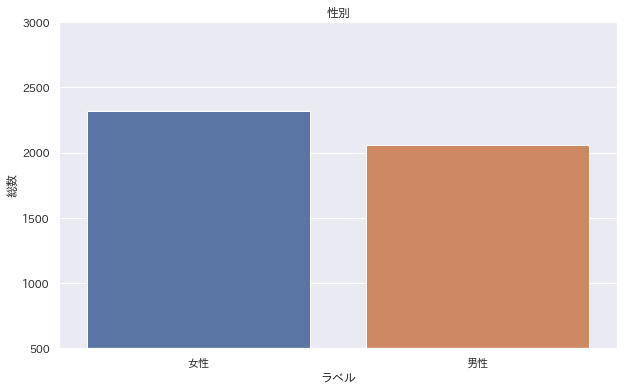

0    2322
1    2058
Name: gender, dtype: int64


In [89]:
import seaborn as sns
sns.set(font='IPAexGothic')
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df)
plt.title('性別')
plt.xlabel('ラベル')
plt.ylabel('総数')
plt.ylim(500,3000)
plt.xticks([0, 1], ['女性', '男性'])
plt.show()
print(df['gender'].value_counts())

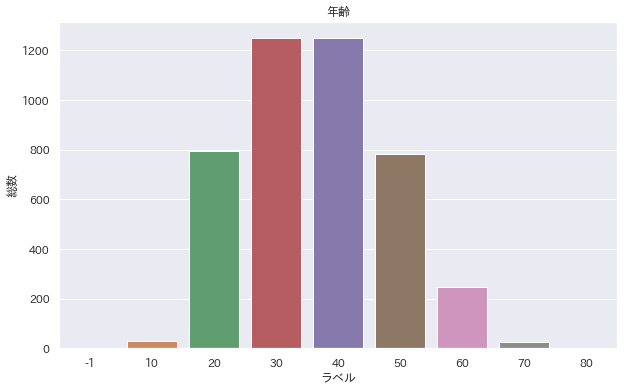

 30    1251
 40    1249
 20     793
 50     781
 60     246
 10      28
 70      26
 80       3
-1        3
Name: age, dtype: int64


In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df)
plt.title('年齢')
plt.xlabel('ラベル')
plt.ylabel('総数')
plt.show()
print(df['age'].value_counts())

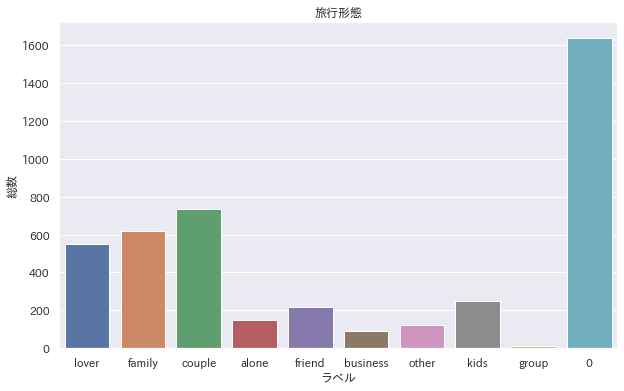

0           1639
couple       734
family       617
lover        548
kids         251
friend       218
alone        147
other        123
business      92
group         11
Name: type, dtype: int64


In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('旅行形態')
plt.xlabel('ラベル')
plt.ylabel('総数')
plt.show()
print(df['type'].value_counts())

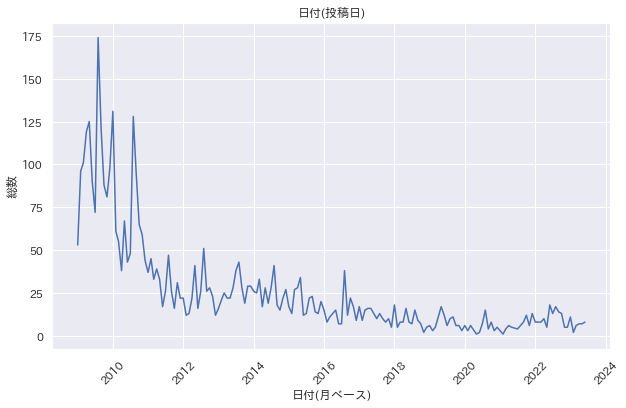

In [92]:
date_counts = df['date'].dt.to_period('M').value_counts().sort_index()
date_counts.index = date_counts.index.to_timestamp()
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values)
plt.title('日付(投稿日)')
plt.xlabel('日付(月ベース)')
plt.ylabel('総数')
plt.xticks(rotation=45)  # 日付ラベルを回転させて見やすくする
plt.show()

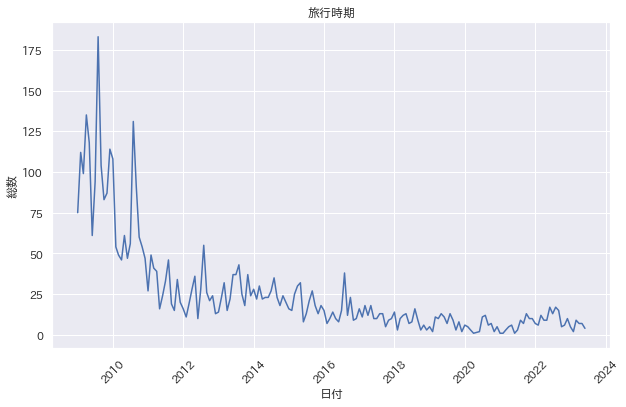

In [93]:
date_counts = df['season'].dt.to_period('M').value_counts().sort_index()
date_counts.index = date_counts.index.to_timestamp()
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values)
plt.title('旅行時期')
plt.xlabel('日付')
plt.ylabel('総数')
plt.xticks(rotation=45)  # 日付ラベルを回転させて見やすくする
plt.show()

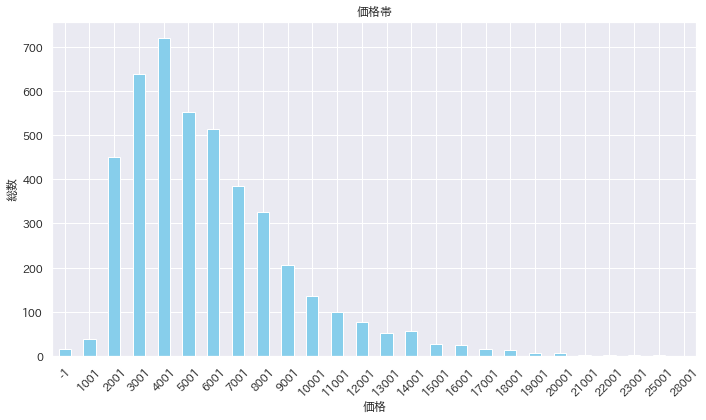

In [94]:
plt.figure(figsize=(10, 6))
df['price'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('価格')
plt.ylabel('総数')
plt.title('価格帯')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# グラフを表示
plt.show()